In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('a2_data/logistic_data.txt', header = None)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X = X - X.mean(axis = 0)
X = X / X.std(axis = 0)
bias= np.ones((df.shape[0],1))
X = np.hstack((X,bias))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def predict(X, w, threshold=0.5):
    h = sigmoid(np.dot(X,w))
#     print(h)
    return h>=threshold

# Without Regularization

In [5]:
def loss(y, h):
    return -(y * np.log(h) + (1 - y) * np.log(1 - h))

In [36]:
w = np.random.randn(X.shape[1])
iterations = 3000
alpha = 0.5
losses = []
for _ in range(iterations):
    z = np.dot(X_train,w)
    h = sigmoid(z)
    l = loss(y_train,h)
    epoch_loss= np.sum(l)/y_train.shape[0]
#     print(epoch_loss)
    losses.append(epoch_loss)
    gradient = np.dot(X_train.T, (h - y_train)) / y_train.size
    w -= alpha * gradient
print(w)

[-6.82723704 -7.07207098 -6.60751005  0.24366309 -2.57874144]


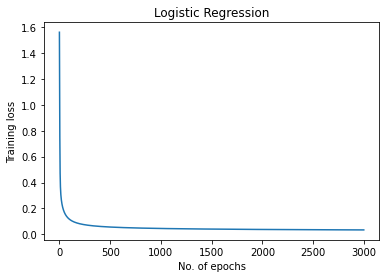

In [37]:
plt.plot(losses)
plt.title('Logistic Regression',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.show()

In [38]:
# Prediction
y_test = np.array(y_test)
# print(y_test)
y_pred = predict(X_test, w)
fp,fn,tp,tn = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (y_pred[i] == 1):
            tp+=1
        else:
            fn+=1
    else:
        if(y_pred[i] == 0):
            tn+=1
        else:
            fp+=1

print(tp,fp,tn,fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = (2 * precision * recall) / (precision + recall)
accuracy= (tp+tn) / (tp+tn+fp+fn)
print('F-score: ', f_score)
print('Accuracy: ', accuracy)

117 2 155 1
F-score:  0.9873417721518987
Accuracy:  0.9890909090909091


# L1 - Regularization

In [33]:
w = np.random.randn(X.shape[1])
iterations = 4000
alpha = 0.5
lambd = 0.01
losses = []
for _ in range(iterations):
    z = np.dot(X_train,w)
    h = sigmoid(z)
    l = loss(y_train,h) + lambd/2 * np.sum(w)
    epoch_loss= np.sum(l)/y_train.shape[0]
#     print(epoch_loss)
    losses.append(epoch_loss)
    gradient = (np.dot(X_train.T, (h - y_train)) + lambd/2*np.sign(w)) / y_train.size 
    w -= alpha * gradient
print(w)

[-7.34134042 -7.68424744 -7.16435608  0.20726468 -2.90009401]


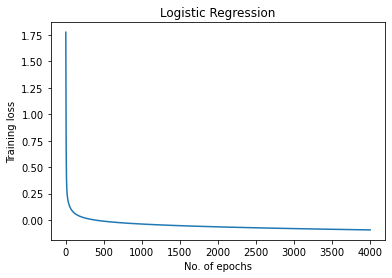

In [34]:
plt.plot(losses)
plt.title('Logistic Regression',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.show()

In [35]:
# Prediction
y_test = np.array(y_test)
# print(y_test)
y_pred = predict(X_test, w)
fp,fn,tp,tn = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (y_pred[i] == 1):
            tp+=1
        else:
            fn+=1
    else:
        if(y_pred[i] == 0):
            tn+=1
        else:
            fp+=1

print(tp,fp,tn,fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = (2 * precision * recall) / (precision + recall)
accuracy= (tp+tn) / (tp+tn+fp+fn)
print('F-score: ', f_score)
print('Accuracy: ', accuracy)

117 1 156 1
F-score:  0.9915254237288136
Accuracy:  0.9927272727272727


# L2 - Regularization

In [68]:
w = np.random.randn(X.shape[1])
iterations = 4000
alpha = 0.02
lambd = 0.005
losses = []
for _ in range(iterations):
    z = np.dot(X_train,w)
    h = sigmoid(z)
    l = loss(y_train,h) + (lambd/2)*np.dot(w,w)
    epoch_loss= np.sum(l)/y_train.shape[0]
    #print(epoch_loss)
    losses.append(epoch_loss)
    gradient = (np.dot(X_train.T, (h-y_train)) + lambd/2* w) / y_train.size
    w -= (alpha * gradient)
print(w)

[-3.40153378 -2.55991453 -2.46764246  0.30988807 -0.62717731]


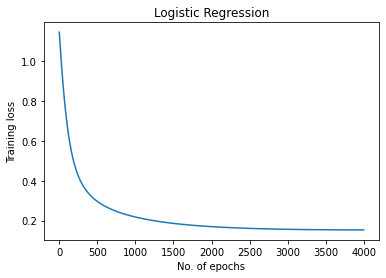

In [69]:
plt.plot(losses)
plt.title('Logistic Regression',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.show()

In [70]:
# Prediction
y_test = np.array(y_test)
# print(y_test)
y_pred = predict(X_test, w)
fp,fn,tp,tn = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (y_pred[i] == 1):
            tp+=1
        else:
            fn+=1
    else:
        if(y_pred[i] == 0):
            tn+=1
        else:
            fp+=1

print(tp,fp,tn,fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = (2 * precision * recall) / (precision + recall)
accuracy= (tp+tn) / (tp+tn+fp+fn)
print('F-score: ', f_score)
print('Accuracy: ', accuracy)

117 4 153 1
F-score:  0.9790794979079498
Accuracy:  0.9818181818181818
